# Python sentiment analysis case study: people's attitudes towards Covid vaccine<font color="#dd0000"> 
   
---

In [80]:
import pandas as pd  # data analysis library
from textblob import TextBlob  # sentiment analysis library
import matplotlib.pyplot as plt  # drawings
from wordcloud import WordCloud  # mapping wordclouds
from wordcloud import ImageColorGenerator
from PIL import Image 
import numpy as np # scientific computation

## 1、Crawling comments（youcos）

In [81]:
file = "mnxlxzxoZx0.xlsx"
df = pd.read_excel(file, usecols=[1, 2, 3, 4, 5]) # reading comment data
df.head(100)

text                  time  \
0   I have never felt more validated than choosing...           3 weeks ago   
1   Many people were cancelled for claiming it did...           3 weeks ago   
2   At this stage, it doesn't matter whether this ...           3 weeks ago   
3   I had to quit my job of 14 years because of pr...  2 weeks ago (edited)   
4   Doing everything supposedly "at risk" is not c...           3 weeks ago   
..                                                ...                   ...   
95                           @Yoskiul Lyterd  awesome           2 weeks ago   
96                                         Same here.           2 weeks ago   
97  Now for the survey asking how many people were...           2 weeks ago   
98   @Bewusst Sein  if you have to ask this questi...           2 weeks ago   
99   @Unafflicted Gaming  nonsense.. all things mu...           2 weeks ago   

                        author                   channel votes  
0                DeviantDespot  UCv-Pss6hAIviuPqj6qX5XZg  2.5K  
1           PandaPandaPandaism  UC9OSObm60RVTiSIfCi6rmhw  1.5K  
2                     Malicant  UCCIp5eO-bxcJZfyi4Lqzj8A  1.7K  
3            Talana van Tonder  UCx-4dr7MfkynBXY1acQTVUA   160  
4                       Chrysa  UCODM8vQd5e68rcoAdt_YJKw  3.2K  
..                         ...                       ...   ...  
95  Solomon David Michael 5688  UCuI-2NFnkIo1MDM9px7EgLg     0  
96                Eylem Simsek  UC6dGZjZX2LEACijQgHyhPdQ     1  
97             William Tyndale  UC-AEmjrXJcdjaDSWlaUsVLQ     2  
98          Unafflicted Gaming  UCKt-jTZvhC1CO9Nq7Crix_w     4  
99                Bewusst Sein  UC4gsWx-WR17q0mtH8SUdB7Q     1  

[100 rows x 5 columns]

In [82]:
df.shape

(100, 5)

In [83]:
# convert a comment field to a list
v_cmt_list = df['text'].values.tolist()
print('length of v_cmt_list is:{}'.format(len(v_cmt_list)))

length of v_cmt_list is:100


## 2、Sentiment analysis

In [84]:
# sentiment analysis
score_list = []  # sentiment rating values
tag_list = []  # marking classification results
for comment in v_cmt_list:
    tag = ''
    judge = TextBlob(comment)
    sentiments_score = judge.sentiment.polarity
    score_list.append(sentiments_score)
    if sentiments_score < 0:
        tag = 'negative'
    elif sentiments_score == 0:
        tag = 'neutral'
    else:
        tag = 'positive'
    tag_list.append(tag)
df['sentiment score'] = score_list
df['results'] = tag_list
df.to_excel('sentiment analysis results.xlsx', index=None)

In [85]:
df.head(100)  # view the 100 rows of results

text                  time  \
0   I have never felt more validated than choosing...           3 weeks ago   
1   Many people were cancelled for claiming it did...           3 weeks ago   
2   At this stage, it doesn't matter whether this ...           3 weeks ago   
3   I had to quit my job of 14 years because of pr...  2 weeks ago (edited)   
4   Doing everything supposedly "at risk" is not c...           3 weeks ago   
..                                                ...                   ...   
95                           @Yoskiul Lyterd  awesome           2 weeks ago   
96                                         Same here.           2 weeks ago   
97  Now for the survey asking how many people were...           2 weeks ago   
98   @Bewusst Sein  if you have to ask this questi...           2 weeks ago   
99   @Unafflicted Gaming  nonsense.. all things mu...           2 weeks ago   

                        author                   channel votes  \
0                DeviantDespot  UCv-Pss6hAIviuPqj6qX5XZg  2.5K   
1           PandaPandaPandaism  UC9OSObm60RVTiSIfCi6rmhw  1.5K   
2                     Malicant  UCCIp5eO-bxcJZfyi4Lqzj8A  1.7K   
3            Talana van Tonder  UCx-4dr7MfkynBXY1acQTVUA   160   
4                       Chrysa  UCODM8vQd5e68rcoAdt_YJKw  3.2K   
..                         ...                       ...   ...   
95  Solomon David Michael 5688  UCuI-2NFnkIo1MDM9px7EgLg     0   
96                Eylem Simsek  UC6dGZjZX2LEACijQgHyhPdQ     1   
97             William Tyndale  UC-AEmjrXJcdjaDSWlaUsVLQ     2   
98          Unafflicted Gaming  UCKt-jTZvhC1CO9Nq7Crix_w     4   
99                Bewusst Sein  UC4gsWx-WR17q0mtH8SUdB7Q     1   

    sentiment score   results  
0          0.500000  positive  
1          0.500000  positive  
2          0.000000   neutral  
3          0.577778  positive  
4          0.000000   neutral  
..              ...       ...  
95         1.000000  positive  
96         0.000000   neutral  
97         0.500000  positive  
98         0.125000  positive  
99         0.000000   neutral  

[100 rows x 7 columns]

In [76]:
df.groupby(by=['results']).count()['text']  # statistical sentiment analysis results

results
negative    16
neutral     42
positive    42
Name: text, dtype: int64

## 3、Drawing wordcloud

In [77]:
# convert list to string
v_cmt_str = ".".join(v_cmt_list)

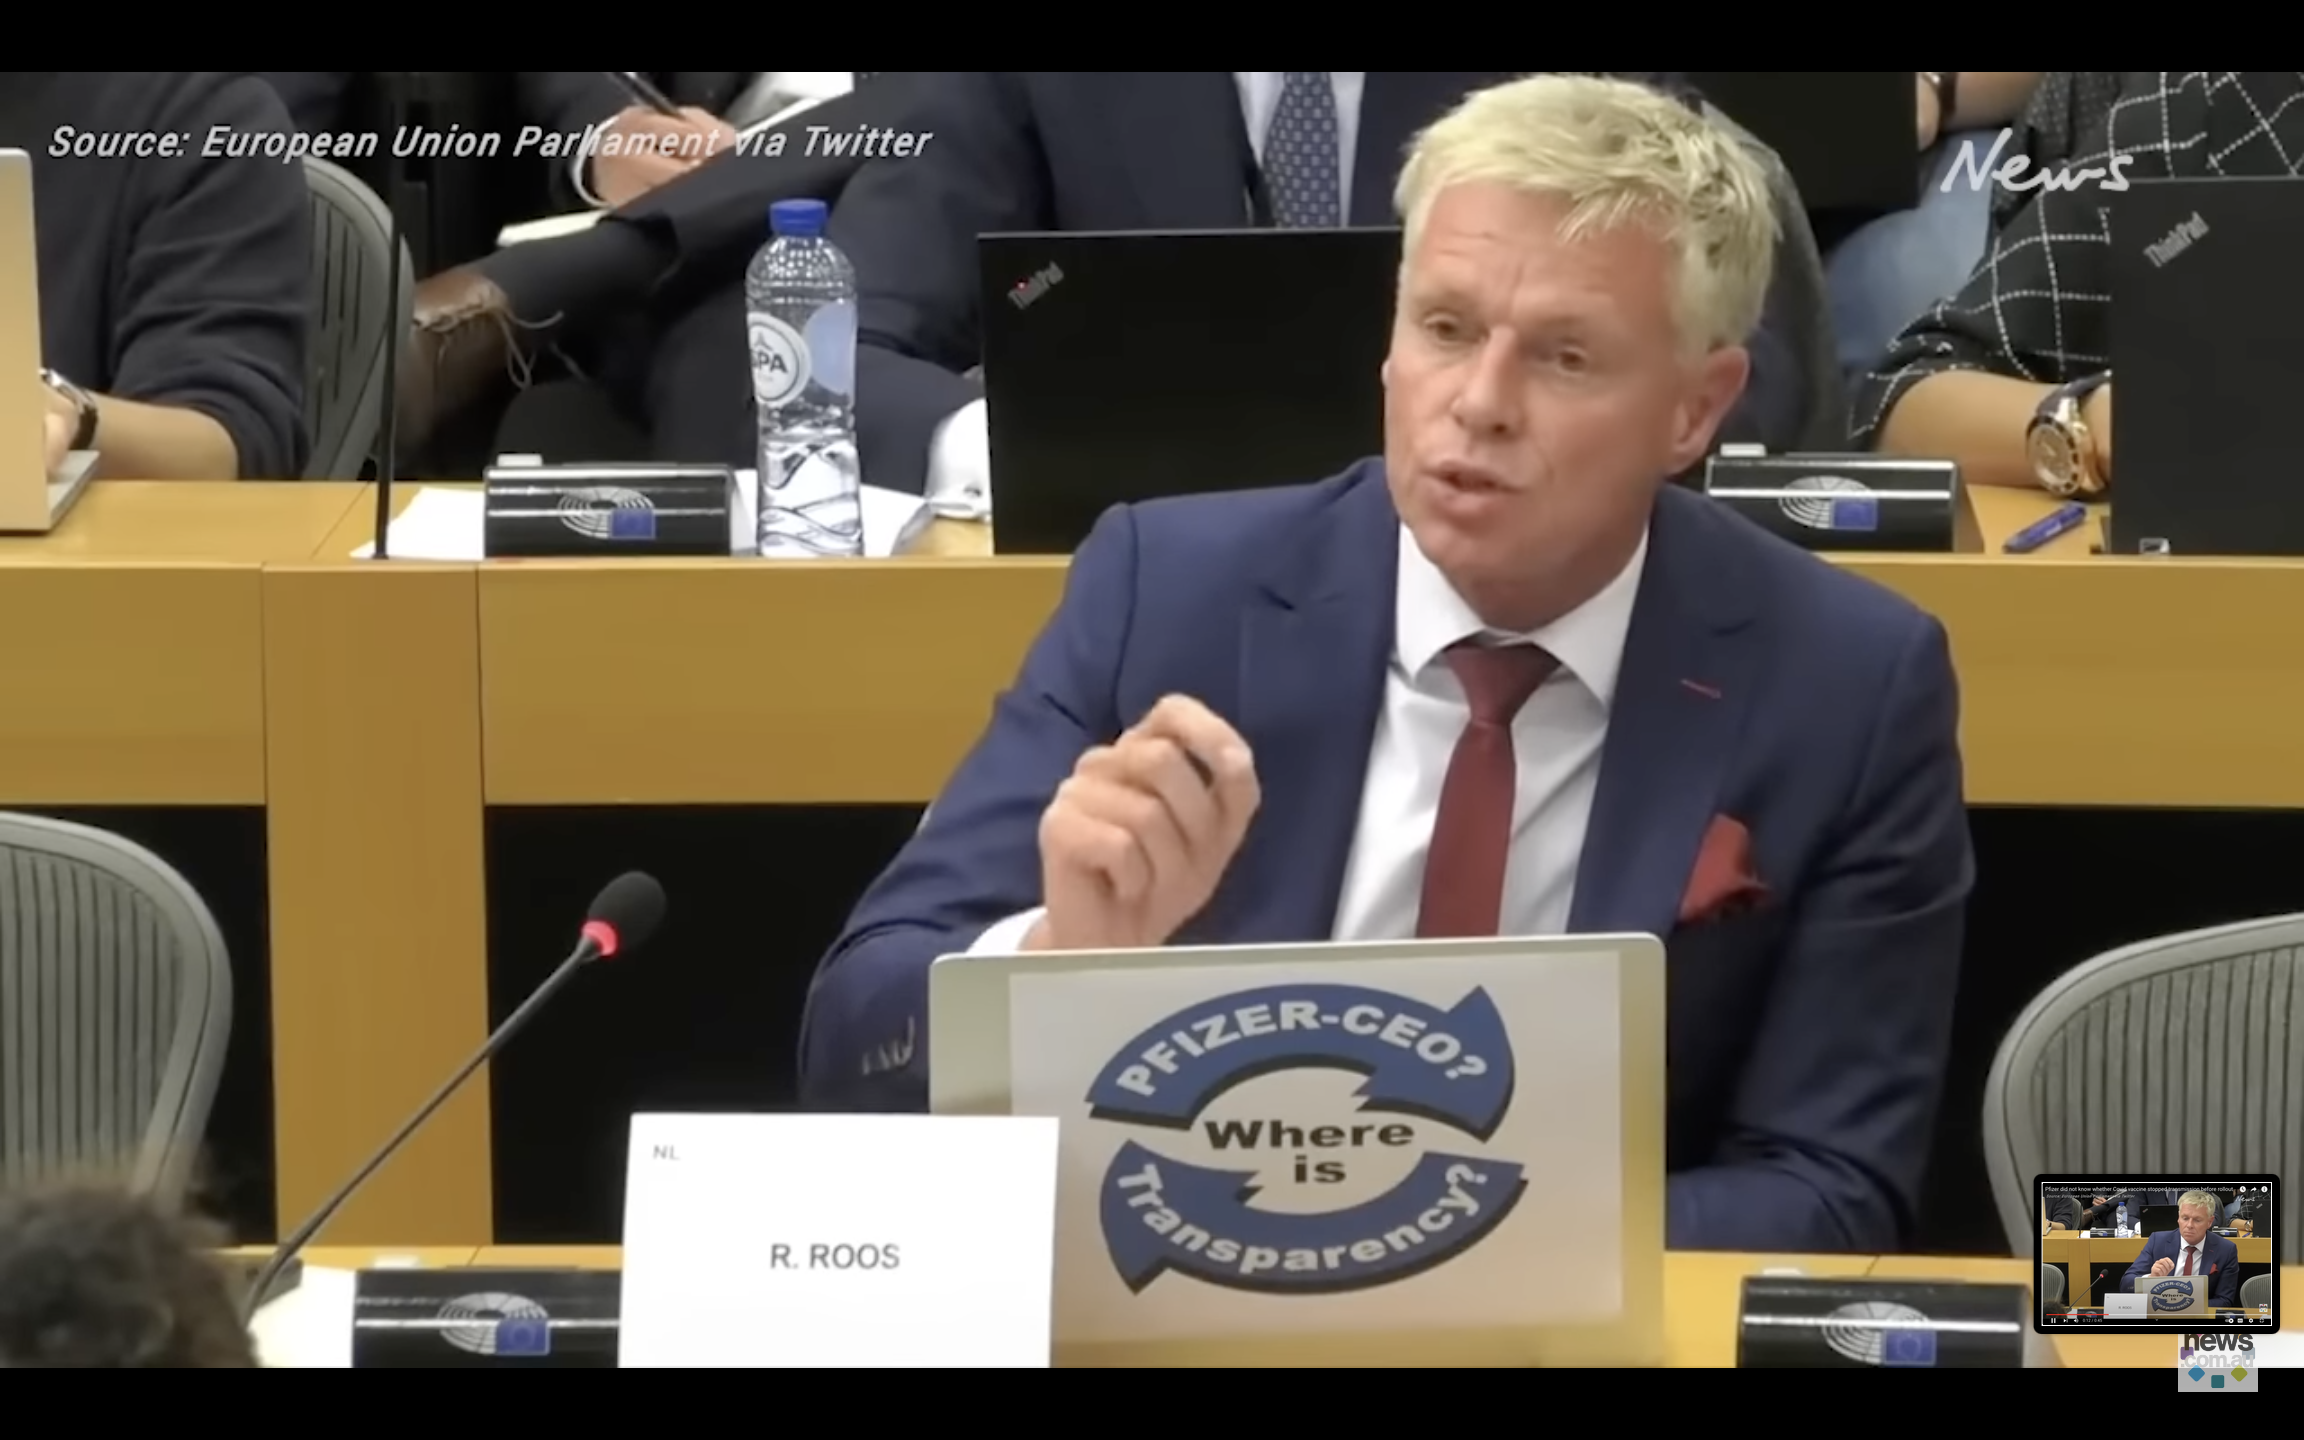

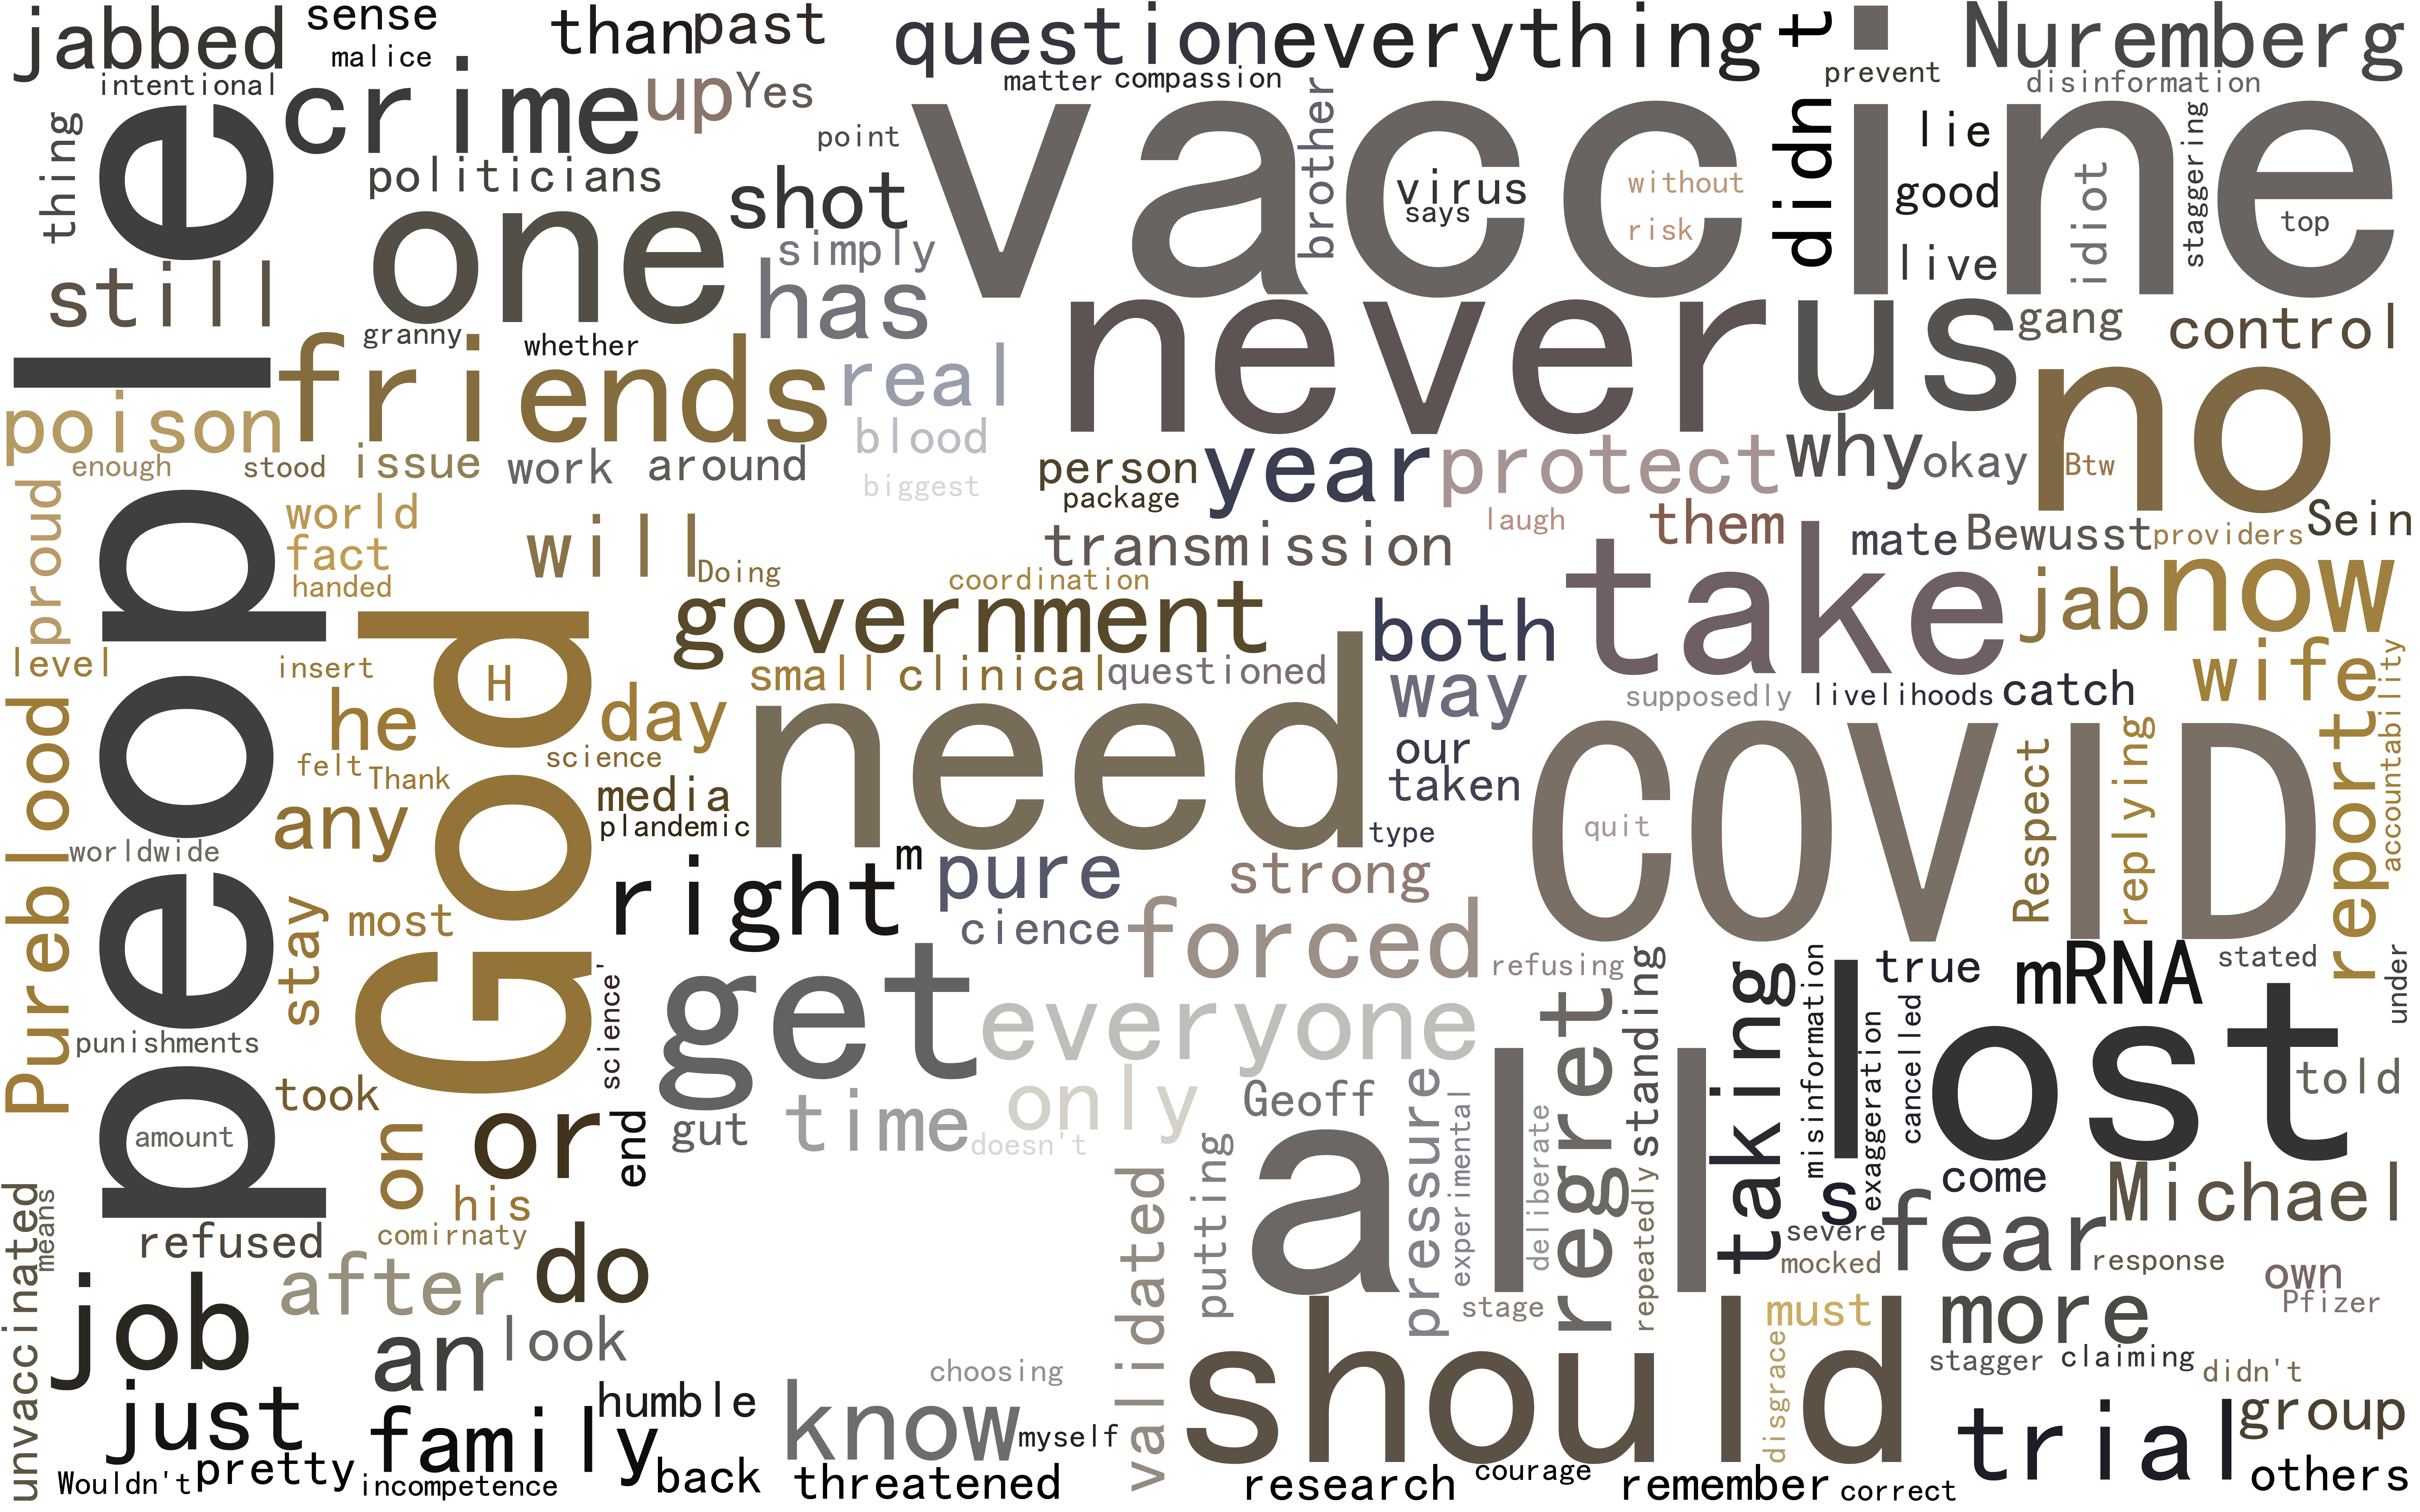

In [79]:
# mapping word clouds
stopwords = ['the', 'a', 'and', 'of', 'it', 'her', 'she', 'if', 'I', 'is', 'not', 'your', 'there', 'this', 'got', 'that', 'did', 'been', 'from', 'had', 'would'
             'that', 'to', 'you', 'in', 'as', 'for', 'are', 'so', 'was', 'but', 'with', 'they', 'have', 'my', 'same', 'at', 'were', 'we', 'here', 'be'
            , 'me' , 'which' , 'out', 'ha', 'by', 'about', 'Nick Brennan', 'above', 'too', 'many', 'Brennan', 'being'
            , 'who' , 'because', 'would', 'how', 'Wendy', 'Huggins', 'other', 'called', 'friend', 'their'
            , 'am', 'Nick', 'where', 'these', 'those']  # stopwords
coloring = np.array(Image.open("vedio screenshots.jpeg"))
backgroud_Image = coloring  # read background image
wc = WordCloud(
    scale=3,  # image size, clarity
    background_color="white",  # background color
    max_words=200,  # number of words
    font_path='simhei.ttf',  # font file paths
    stopwords=stopwords,  # stop word
    mask=backgroud_Image,  # background image
    color_func=ImageColorGenerator(coloring),  # generate wordcloud from the image colours
    max_font_size=10000,  # set maximum font size
    random_state=240  # set how many colour schemes there are
)
wc.generate(v_cmt_str)  # generate wordcloud
wc.to_file('Wordcloud graph.png')  # save image file
display(Image.open('vedio screenshots.jpeg'))  # show original image
wc.to_image()  # show wordcloud